In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import random
import seaborn as sns
sns.set()

Using TensorFlow backend.


In [10]:
# This dataset contains information collected by the U.S Census Service concerning 
# housing in the area of Boston Mass. It was obtained from the StatLib archive 
# (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively 
# throughout the literature to benchmark algorithms.
#     1. CRIM      per capita crime rate by town
#     2. ZN        proportion of residential land zoned for lots over 
#                  25,000 sq.ft.
#     3. INDUS     proportion of non-retail business acres per town
#     4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                  river; 0 otherwise)
#     5. NOX       nitric oxides concentration (parts per 10 million)
#     6. RM        average number of rooms per dwelling
#     7. AGE       proportion of owner-occupied units built prior to 1940
#     8. DIS       weighted distances to five Boston employment centres
#     9. RAD       index of accessibility to radial highways
#     10. TAX      full-value property-tax rate per $10,000
#     11. PTRATIO  pupil-teacher ratio by town
#     12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                  by town
#     13. LSTAT    % lower status of the population
#     14. MEDV     Median value of owner-occupied homes in $1000's
df = pd.read_csv('housing-data.csv')

df = df.sample(frac=1).reset_index(drop=True)

df = df.dropna(subset=['MEDV'])
df = df.fillna(df.mean())

df = df[df['MEDV'] != 50]

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.642567,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722150,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.612870,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


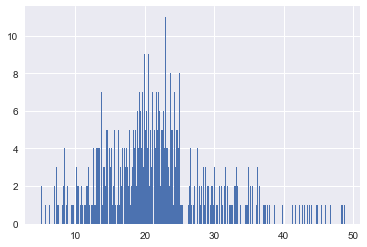

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [11]:
df['MEDV'].hist(bins=300)
plt.show()

df[df['MEDV'] == 50]

In [12]:
def min_max_normalize(series):
    return (series - series.min()) / (series.max()-series.min())

input = min_max_normalize(df.iloc[:, :13]).as_matrix()
target = df.iloc[:, 13:].as_matrix()

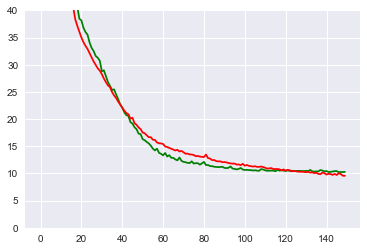

3.2064016818284484

In [14]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

training_data = model.fit(input, target, validation_split=0.3, epochs=150, batch_size=10, verbose=False)

plt.plot(training_data.history['val_loss'], 'g', training_data.history['loss'], 'r')
plt.ylim(0, 40)
plt.show()

training_data.history['val_loss'][-1] ** 0.5